## Get mean waveforms from templates for a sessions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Session import Session

In [3]:
name="mn8578-30112021-0107"

In [4]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/mn8578/mn8578-30112021-0107/
Mouse: mn8578
Session: 30112021-0107
Name: mn8578-30112021-0107 , mn8578-30112021-0107

Path: OK


In [5]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = mn8578-30112021-0107
path = /adata/electro/mn8578/mn8578-30112021-0107
subject = mn8578
session_dat_time = 2021-11-30 01:07:00
fileBase = /adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107
file_names = {'par': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.par', 'desen': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.desen', 'desel': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.desel', 'sampling_rate': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.sampling_rate_dat', 'stimulation': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.stimulation', 'px_per_cm': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.px_per_cm', 'setup': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.setup', 'environmentFamiliarity': '/adata/electro/mn8578/mn8578-30112021-0107/mn8578-30112021-0107.environmentFamiliarity', 'params':

In [6]:
stl = Spike_train_loader()
#~ stl.load_spike_train_kilosort(ses, only_good=False)
#~ 
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids",len(stl.clu_ids), stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids 25 [ 20  22  45  48  57  67  79 104 107 108 109 111 115 116 119 129 137 141
 147 164 171 175 181 189 221]


In [7]:
#cg.set_info_from_session(ses, maxchannels=5)

In [8]:
ses.load_waveforms(verbose=True)
ses.load_templates_clusters(verbose=True)

Templates: 65 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 1914709 , clusters: 119


id: 0, cluid: 20


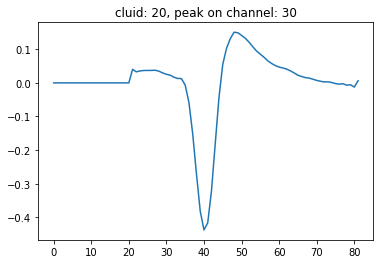

id: 1, cluid: 22


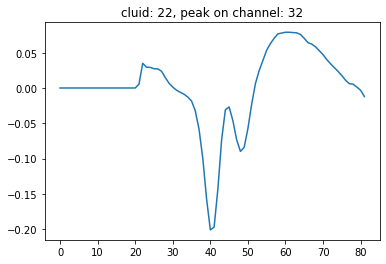

id: 2, cluid: 45


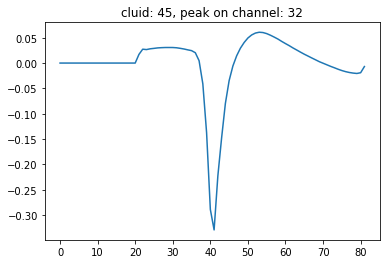

id: 3, cluid: 48


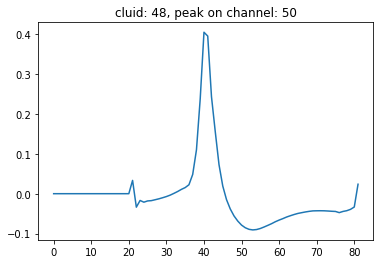

id: 4, cluid: 57


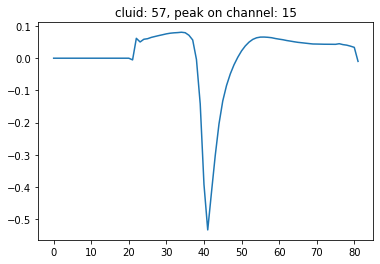

id: 5, cluid: 67


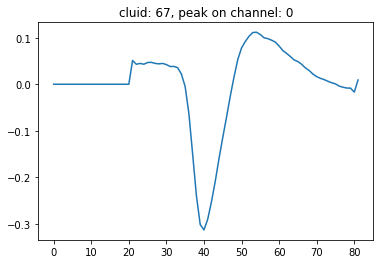

id: 6, cluid: 79


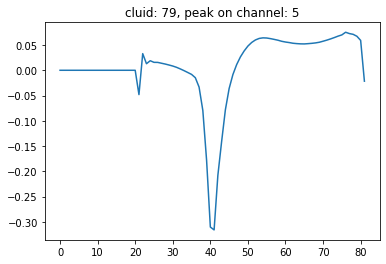

id: 7, cluid: 104


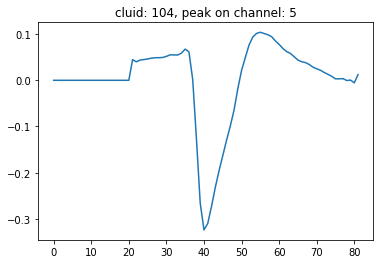

id: 8, cluid: 107


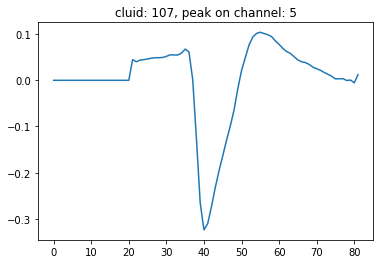

id: 9, cluid: 108


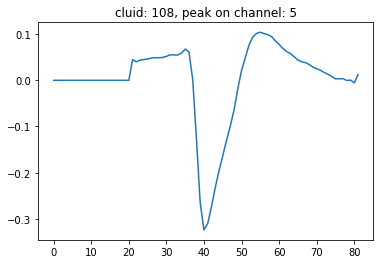

id: 10, cluid: 109


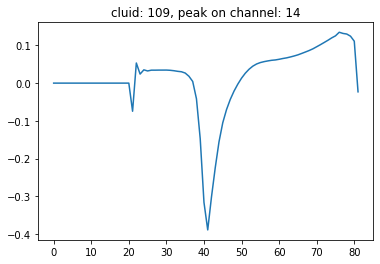

id: 11, cluid: 111


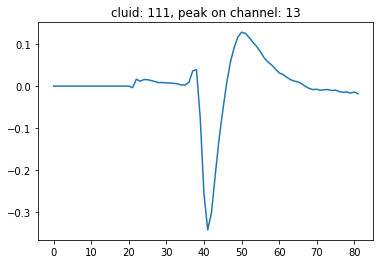

id: 12, cluid: 115


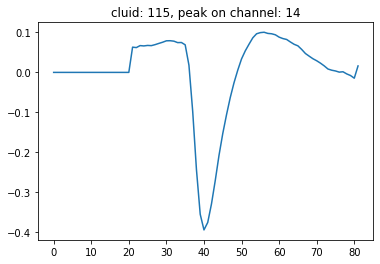

id: 13, cluid: 116


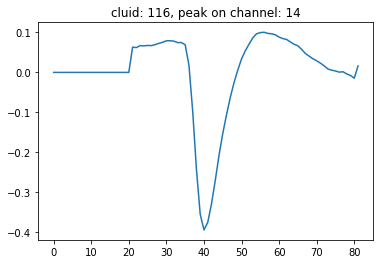

id: 14, cluid: 119


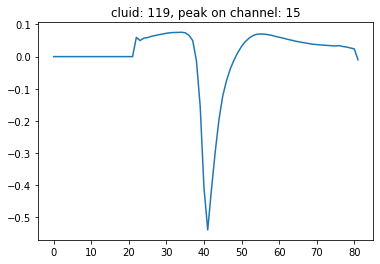

id: 15, cluid: 129


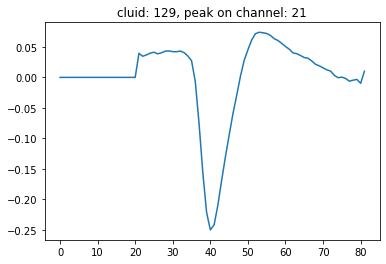

id: 16, cluid: 137


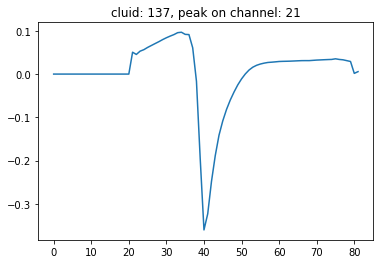

id: 17, cluid: 141


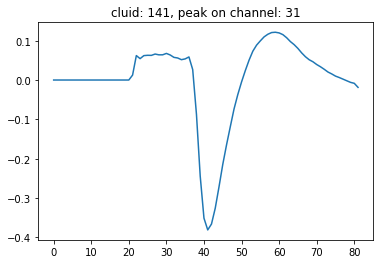

id: 18, cluid: 147


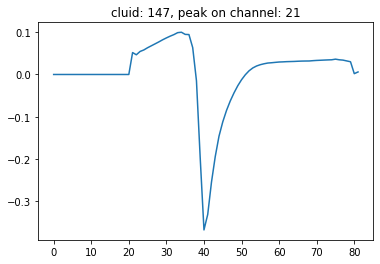

id: 19, cluid: 164


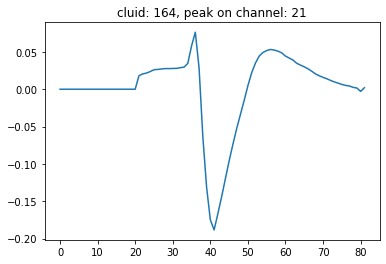

id: 20, cluid: 171


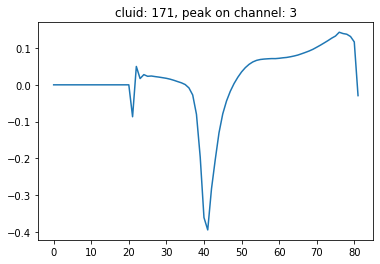

id: 21, cluid: 175


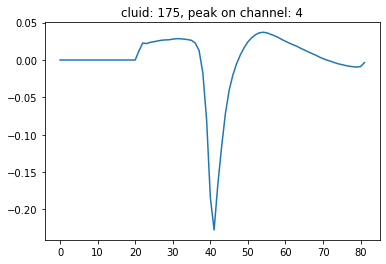

id: 22, cluid: 181


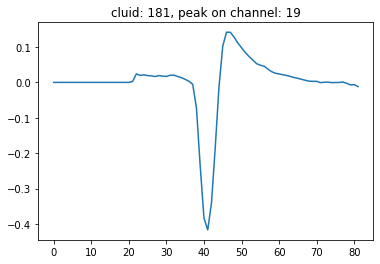

id: 23, cluid: 189


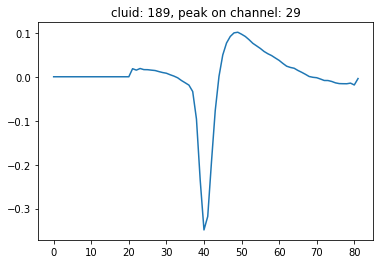

id: 24, cluid: 221


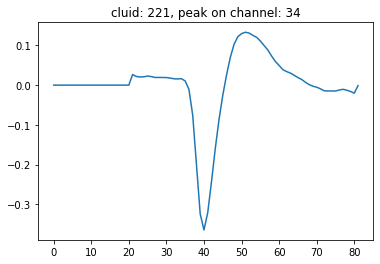

In [12]:
for i,n in enumerate(cg.neuron_list):
    cluid = n.cluster_number
    print("id: {}, cluid: {}".format(i, cluid))
    
    # get all waveforms of that cluster
    cluster_waveforms = ses.get_waveforms_from_cluster(cluid)
    # get highest channel
    idx = ses.get_channels_from_waveforms(cluster_waveforms, cnt=1, method="ptp")[0]
    
    # plot
    plt.plot(cluster_waveforms[:,idx])
    plt.title("cluid: {}, peak on channel: {}".format(cluid,idx))
    plt.show()